# Data cleaning 2019-2023 file

In [2]:
import pandas as pd
global_df=pd.read_csv("/Users/clemence/IRONHACK/Final_project/Concatenation/2019to2023.csv")

/var/folders/54/4cl_lcsx2v3_cd3ntyrh62340000gn/T/ipykernel_37802/2806150228.py:2: DtypeWarning: Columns (8,10,19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  global_df=pd.read_csv("/Users/clemence/IRONHACK/Final_project/Concatenation/2019to2023.csv")


In [64]:
global_df.head()

,Unnamed: 0,journey_id,trip_id,journey_start_datetime,journey_start_date,journey_start_time,journey_start_lon,journey_start_lat,journey_start_insee,journey_start_postalcode,...,journey_end_postalcode,journey_end_department,journey_end_town,journey_end_towngroup,journey_end_country,passenger_seats,operator_class,journey_distance,journey_duration,has_incentive
0,0,2520011,f5bc5273-79ab-42c9-9c22-aef9b375f87e,2020-02-01T00:00:00+01:00,2020-02-01,00:00:00,2.51,48.89,93062,93340.0,...,93390.0,93.0,Clichy-sous-Bois (93),Ile-De-France Mobilites,France,1,B,3187,47,OUI
1,1,2519969,b737dca1-e1e8-4d73-bac5-4f2240b153f3,2020-02-01T00:00:00+01:00,2020-02-01,00:00:00,2.76,48.85,77307,77144.0,...,77450.0,77.0,Montry (77),Ile-De-France Mobilites,France,1,C,8773,15,OUI
2,2,2519968,c6e2cdda-2348-4389-8490-78b2704a43a5,2020-02-01T00:00:00+01:00,2020-02-01,00:00:00,2.28,48.84,75056,75001.0,...,92130.0,92.0,Issy-les-Moulineaux (92),Ile-De-France Mobilites,France,1,C,3143,15,OUI
3,3,2519970,e6baafd7-1aeb-4a6e-b7aa-3f5f54e4559b,2020-02-01T00:00:00+01:00,2020-02-01,00:00:00,2.26,48.72,91377,91300.0,...,91380.0,91.0,Chilly-Mazarin (91),Ile-De-France Mobilites,France,1,C,7491,16,OUI
4,4,2519963,8b31f193-af61-4664-bbde-52d93271dc95,2020-02-01T00:00:00+01:00,2020-02-01,00:00:00,2.78,48.87,77132,77700.0,...,77700.0,77.0,Magny-le-Hongre (77),Ile-De-France Mobilites,France,1,C,3991,8,OUI


- Unnamed:0 can be set as index or dropped
- Journey_id is the primary key 
- trip_id can have duplicates because one more passenger will had a row
- passenger_seats means all the seats reserved by one passenger, we can transform this column to reflect only the number of passenger, according to the number of duplicates of trip_id


## Dealing with the trip_id column

In [65]:
global_df["passenger_seats"].value_counts()

1    10181091
2         879
3         686
4         310
Name: passenger_seats, dtype: int64

In [66]:
global_df.duplicated().sum()

0

In [2]:
global_df["trip_id"].value_counts()

d42ba77f-6a82-4f16-a1d0-912c395d8808    58
e5fee430-f6d3-4f6a-8a9f-3b58a3a11391    42
6a38b220-0d47-40a1-b428-18a2623838e6    42
e02d0d48-c7fb-4166-9414-21277e687a70    37
729d9905-9f04-451a-9a69-019db1caef6f    34
                                        ..
2490e16e-fce7-415b-932d-165200515df2     1
ecc5e1e9-9f81-46ae-a8b1-55113f11c40f     1
4b768a70-7330-4c00-b764-2328033a52ec     1
368427f4-5ead-4acd-93dc-89586a062e24     1
bd93266e-4852-4c43-9830-d27640f2d0ff     1
Name: trip_id, Length: 8060928, dtype: int64

In [3]:
frequence_trip=pd.DataFrame(global_df["trip_id"].value_counts())

In [5]:
frequence_trip.describe()

,trip_id
count,8.060928e+06
mean,1.263250e+00
std,6.104734e-01
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,5.800000e+01


In [6]:
stats = frequence_trip.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
trip_id,8060928.0,1.26325,0.610473,1.0,1.0,1.0,1.0,58.0,0.0


In [7]:
#We can't calculate the outliers with a 1,5 cutoff

In [9]:
import matplotlib.pyplot as plt

KeyboardInterrupt: 

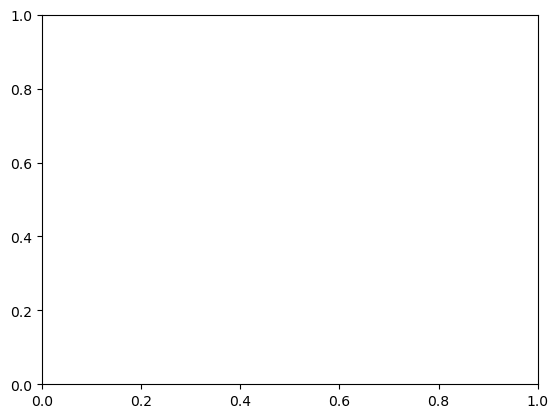

In [10]:
trip_id_counts = pd.Series(global_df["trip_id"].value_counts())

# trip_id with counts>9
#filtered_counts=trip_id_counts[trip_id_counts>9]
#value_counts = filtered_counts.value_counts()

#plot distribution 
plt.bar(trip_id_counts.index, trip_id_counts.values)
plt.xlabel('Fréquence')
plt.ylabel('Nombre de valeurs')
plt.title('Fréquences des valeurs')
plt.show()

In [9]:
#We can drop all the trip_id are > 8 because it seems to be outliers

In [67]:
trip_id_to_keep = trip_id_counts[trip_id_counts <= 8].index.tolist() #liste des trip_id that are not mistakes

global_df = global_df[global_df["trip_id"].isin(trip_id_to_keep)]


In [68]:
global_df.shape #10182966 > 10176210 environ 9000 rows dropped

(10173216, 30)

In [11]:
#We want now to transform the number of frequencies in number of passengers 

In [11]:
trip_id_counts = global_df['trip_id'].value_counts()

# create a new column with the frequencies of trip_id and the number of passenger_seats (we should retire 1 but we won't this way we count the driver)
global_df['nb_passengers'] = global_df['trip_id'].map(trip_id_counts)+global_df["passenger_seats"]#-1

global_df.head()

,Unnamed: 0,journey_id,trip_id,journey_start_datetime,journey_start_date,journey_start_time,journey_start_lon,journey_start_lat,journey_start_insee,journey_start_postalcode,...,journey_end_department,journey_end_town,journey_end_towngroup,journey_end_country,passenger_seats,operator_class,journey_distance,journey_duration,has_incentive,nb_passengers
0,0,2520011,f5bc5273-79ab-42c9-9c22-aef9b375f87e,2020-02-01T00:00:00+01:00,2020-02-01,00:00:00,2.51,48.89,93062,93340.0,...,93.0,Clichy-sous-Bois (93),Ile-De-France Mobilites,France,1,B,3187,47,OUI,2
1,1,2519969,b737dca1-e1e8-4d73-bac5-4f2240b153f3,2020-02-01T00:00:00+01:00,2020-02-01,00:00:00,2.76,48.85,77307,77144.0,...,77.0,Montry (77),Ile-De-France Mobilites,France,1,C,8773,15,OUI,2
2,2,2519968,c6e2cdda-2348-4389-8490-78b2704a43a5,2020-02-01T00:00:00+01:00,2020-02-01,00:00:00,2.28,48.84,75056,75001.0,...,92.0,Issy-les-Moulineaux (92),Ile-De-France Mobilites,France,1,C,3143,15,OUI,2
3,3,2519970,e6baafd7-1aeb-4a6e-b7aa-3f5f54e4559b,2020-02-01T00:00:00+01:00,2020-02-01,00:00:00,2.26,48.72,91377,91300.0,...,91.0,Chilly-Mazarin (91),Ile-De-France Mobilites,France,1,C,7491,16,OUI,2
4,4,2519963,8b31f193-af61-4664-bbde-52d93271dc95,2020-02-01T00:00:00+01:00,2020-02-01,00:00:00,2.78,48.87,77132,77700.0,...,77.0,Magny-le-Hongre (77),Ile-De-France Mobilites,France,1,C,3991,8,OUI,2


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff55239b040>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff55239b5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff552388d30>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff55239bb80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff55239be50>],
 'means': []}

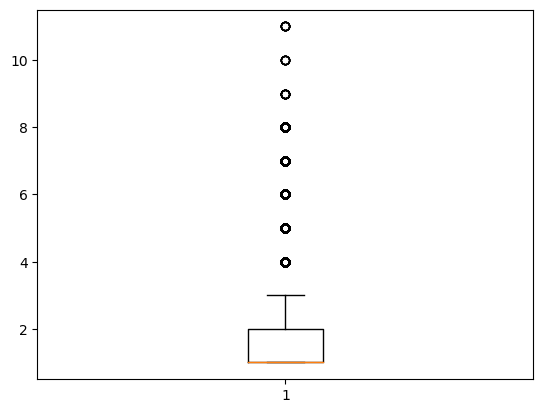

In [13]:
plt.boxplot(global_df["nb_passengers"])

In [12]:
global_df.shape

(10182966, 31)

## Drop the useless columns

In [31]:
#we can now drop the passenger_seats column 

In [13]:
global_df = global_df.drop("passenger_seats", axis=1)

In [14]:
#we can also safely drop unnamed:0
global_df = global_df.drop("Unnamed: 0", axis=1)

In [74]:
global_df = global_df.drop("operator_class", axis=1)

Others unnecessary columns : 
- journey_start_postalcode is giving the same information as journey_start_insee, insee code is a better primary key 
- same for journey_end_postalcode 

In [15]:
global_df = global_df.drop(["journey_start_postalcode","journey_end_postalcode"], axis=1)

I don't need the name of the towns neither because I will put all the geographical information in a other table

In [16]:
global_df = global_df.drop(["journey_start_town","journey_end_town"], axis=1)

In [17]:
global_df.shape

(10182966, 25)

We can eliminate from our data all the carpooling journey coming from other countries, as we want to study how to encourage carpooling starting in France. 

In [18]:
global_df["journey_start_country"].value_counts()

France         10013282
Switzerland       47654
SUISSE            37229
MONACO            35267
Monaco            17176
ITALIE            14351
LUXEMBOURG        10432
Italy              2681
BELGIQUE           1708
ALLEMAGNE          1275
Luxembourg          688
Belgium             405
Algeria             240
Germany              90
ESPAGNE              77
ANDORRE               4
Name: journey_start_country, dtype: int64

In [19]:
global_df = global_df[global_df["journey_start_country"]=="France"]

In [22]:
global_df = global_df.drop("journey_start_country", axis=1)

In [24]:
global_df["journey_end_country"].value_counts()

France         9870238
Switzerland      52458
SUISSE           41060
MONACO           23427
Monaco           17832
LUXEMBOURG        5588
Luxembourg         883
ALLEMAGNE          545
BELGIQUE           390
ITALIE             371
Belgium            271
Germany             95
Italy               63
ESPAGNE             61
Name: journey_end_country, dtype: int64

In [25]:
global_df = global_df[global_df["journey_end_country"]=="France"]

In [26]:
global_df = global_df.drop("journey_end_country", axis=1)

In [27]:
global_df.shape

(9870238, 23)

## Checking for types 

In [28]:
global_df.dtypes

journey_id                    int64
trip_id                      object
journey_start_datetime       object
journey_start_date           object
journey_start_time           object
journey_start_lon           float64
journey_start_lat           float64
journey_start_insee          object
journey_start_department     object
journey_start_towngroup      object
journey_end_datetime         object
journey_end_date             object
journey_end_time             object
journey_end_lon             float64
journey_end_lat             float64
journey_end_insee            object
journey_end_department       object
journey_end_towngroup        object
operator_class               object
journey_distance              int64
journey_duration              int64
has_incentive                object
nb_passengers                 int64
dtype: object

## Checking for missing values 

In [29]:
global_df.isnull().sum()

journey_id                       0
trip_id                          0
journey_start_datetime           0
journey_start_date               0
journey_start_time               0
journey_start_lon                0
journey_start_lat                0
journey_start_insee              0
journey_start_department       427
journey_start_towngroup     287730
journey_end_datetime             0
journey_end_date                 0
journey_end_time                 0
journey_end_lon                  0
journey_end_lat                  0
journey_end_insee                0
journey_end_department         436
journey_end_towngroup       281359
operator_class                   0
journey_distance                 0
journey_duration                 0
has_incentive                    0
nb_passengers                    0
dtype: int64

In [30]:
#We can fill null values in towngroup with "NA"
global_df["journey_start_towngroup"].fillna("NA",inplace=True)
global_df["journey_end_towngroup"].fillna("NA",inplace=True)

In [31]:
global_df.isnull().sum()

journey_id                    0
trip_id                       0
journey_start_datetime        0
journey_start_date            0
journey_start_time            0
journey_start_lon             0
journey_start_lat             0
journey_start_insee           0
journey_start_department    427
journey_start_towngroup       0
journey_end_datetime          0
journey_end_date              0
journey_end_time              0
journey_end_lon               0
journey_end_lat               0
journey_end_insee             0
journey_end_department      436
journey_end_towngroup         0
operator_class                0
journey_distance              0
journey_duration              0
has_incentive                 0
nb_passengers                 0
dtype: int64

In [32]:
#We can drop the rows with missing values in journey_start_department 

In [33]:
global_df.dropna(subset=["journey_start_department"], inplace=True)

In [34]:
global_df.isnull().sum()

journey_id                    0
trip_id                       0
journey_start_datetime        0
journey_start_date            0
journey_start_time            0
journey_start_lon             0
journey_start_lat             0
journey_start_insee           0
journey_start_department      0
journey_start_towngroup       0
journey_end_datetime          0
journey_end_date              0
journey_end_time              0
journey_end_lon               0
journey_end_lat               0
journey_end_insee             0
journey_end_department      432
journey_end_towngroup         0
operator_class                0
journey_distance              0
journey_duration              0
has_incentive                 0
nb_passengers                 0
dtype: int64

In [35]:
global_df.dropna(subset=["journey_end_department"], inplace=True)
global_df.isnull().sum()

journey_id                  0
trip_id                     0
journey_start_datetime      0
journey_start_date          0
journey_start_time          0
journey_start_lon           0
journey_start_lat           0
journey_start_insee         0
journey_start_department    0
journey_start_towngroup     0
journey_end_datetime        0
journey_end_date            0
journey_end_time            0
journey_end_lon             0
journey_end_lat             0
journey_end_insee           0
journey_end_department      0
journey_end_towngroup       0
operator_class              0
journey_distance            0
journey_duration            0
has_incentive               0
nb_passengers               0
dtype: int64

## Checking incorrect values

In [37]:
global_df.describe()

,journey_id,journey_start_lon,journey_start_lat,journey_end_lon,journey_end_lat,journey_distance,journey_duration,nb_passengers
count,9.869379e+06,9.869379e+06,9.869379e+06,9.869379e+06,9.869379e+06,9.869379e+06,9.869379e+06,9.869379e+06
mean,6.432731e+06,2.471411e+00,4.757856e+01,2.471602e+00,4.757883e+01,2.332628e+04,2.803744e+01,2.552668e+00
std,3.295520e+06,4.123029e+00,5.023259e+00,4.122796e+00,5.023230e+00,2.192323e+04,2.027438e+01,9.593580e-01
min,9.344150e+05,-6.174000e+01,-2.138600e+01,-6.173900e+01,-2.138600e+01,0.000000e+00,0.000000e+00,2.000000e+00
25%,3.557638e+06,1.506000e+00,4.731500e+01,1.507000e+00,4.731500e+01,8.566000e+03,1.500000e+01,2.000000e+00
50%,6.316422e+06,2.290000e+00,4.876000e+01,2.290000e+00,4.876000e+01,1.815300e+04,2.500000e+01,2.000000e+00
75%,9.125948e+06,2.610000e+00,4.890000e+01,2.610000e+00,4.890000e+01,3.155000e+04,3.700000e+01,3.000000e+00
max,1.240313e+07,5.582900e+01,5.105500e+01,5.582600e+01,5.105600e+01,1.132379e+06,1.429000e+03,5.900000e+01


- Number of passenger between 2 and 12 : third quartile at 2 so it is okay. The distribution seems logical. No incorrect values.
- Duration : min at 0 min, so that errors. And max is 1429 min so 23hours, that seems a lot for a trip inside France. Check the outliers.
- Distance : 0 seems also an incorrect value. Max corresponds to 1132km, corresponds to a dunkerque-marseille journey so it is realistic. 

#### Duration

In [38]:
global_df.head()

,journey_id,trip_id,journey_start_datetime,journey_start_date,journey_start_time,journey_start_lon,journey_start_lat,journey_start_insee,journey_start_department,journey_start_towngroup,...,journey_end_lon,journey_end_lat,journey_end_insee,journey_end_department,journey_end_towngroup,operator_class,journey_distance,journey_duration,has_incentive,nb_passengers
0,2520011,f5bc5273-79ab-42c9-9c22-aef9b375f87e,2020-02-01T00:00:00+01:00,2020-02-01,00:00:00,2.51,48.89,93062,93.0,Ile-De-France Mobilites,...,2.54,48.90,93014,93.0,Ile-De-France Mobilites,B,3187,47,OUI,2
1,2519969,b737dca1-e1e8-4d73-bac5-4f2240b153f3,2020-02-01T00:00:00+01:00,2020-02-01,00:00:00,2.76,48.85,77307,77.0,Ile-De-France Mobilites,...,2.83,48.88,77315,77.0,Ile-De-France Mobilites,C,8773,15,OUI,2
2,2519968,c6e2cdda-2348-4389-8490-78b2704a43a5,2020-02-01T00:00:00+01:00,2020-02-01,00:00:00,2.28,48.84,75056,75.0,Ile-De-France Mobilites,...,2.28,48.82,92040,92.0,Ile-De-France Mobilites,C,3143,15,OUI,2
3,2519970,e6baafd7-1aeb-4a6e-b7aa-3f5f54e4559b,2020-02-01T00:00:00+01:00,2020-02-01,00:00:00,2.26,48.72,91377,91.0,Ile-De-France Mobilites,...,2.31,48.70,91161,91.0,Ile-De-France Mobilites,C,7491,16,OUI,2
4,2519963,8b31f193-af61-4664-bbde-52d93271dc95,2020-02-01T00:00:00+01:00,2020-02-01,00:00:00,2.78,48.87,77132,77.0,Ile-De-France Mobilites,...,2.81,48.87,77268,77.0,Ile-De-France Mobilites,C,3991,8,OUI,2


In [39]:
global_df['journey_duration'].value_counts()[0]

261814

In [40]:
#Let's if I can calculate it or drop these rows

In [41]:
test=global_df[global_df["journey_duration"]==0]

In [42]:
pd.set_option('display.max_columns', 500)
test.head()

,journey_id,trip_id,journey_start_datetime,journey_start_date,journey_start_time,journey_start_lon,journey_start_lat,journey_start_insee,journey_start_department,journey_start_towngroup,journey_end_datetime,journey_end_date,journey_end_time,journey_end_lon,journey_end_lat,journey_end_insee,journey_end_department,journey_end_towngroup,operator_class,journey_distance,journey_duration,has_incentive,nb_passengers
101,2520025,03c22ec0-5b6c-4723-8cc2-3f5bb24a4d80,2020-02-01T01:10:00+01:00,2020-02-01,01:10:00,2.74,48.87,77307,77.0,Ile-De-France Mobilites,2020-02-01T01:20:00+01:00,2020-02-01,01:20:00,2.43,48.84,94080,94.0,Ile-De-France Mobilites,C,29101,0,OUI,4
114,2520027,03c22ec0-5b6c-4723-8cc2-3f5bb24a4d80,2020-02-01T01:20:00+01:00,2020-02-01,01:20:00,2.74,48.87,77307,77.0,Ile-De-France Mobilites,2020-02-01T01:20:00+01:00,2020-02-01,01:20:00,2.43,48.84,94080,94.0,Ile-De-France Mobilites,C,29101,0,OUI,4
270,2526390,7d5a6555-be3e-4e0c-b046-a8be92a4d129,2020-02-01T06:10:00+01:00,2020-02-01,06:10:00,2.81,48.86,77268,77.0,Ile-De-France Mobilites,2020-02-01T06:10:00+01:00,2020-02-01,06:10:00,2.78,48.87,77132,77.0,Ile-De-France Mobilites,B,3784,0,OUI,2
917,2532553,9f1371ac-289c-4c02-8111-e4bce7ff1bac,2020-02-01T09:50:00+01:00,2020-02-01,09:50:00,2.34,48.67,91589,91.0,Ile-De-France Mobilites,2020-02-01T09:50:00+01:00,2020-02-01,09:50:00,2.21,48.78,78442,78.0,Ile-De-France Mobilites,B,18363,0,OUI,2
1243,2532768,994ddc24-b23a-454d-aa3d-55077d091054,2020-02-01T11:10:00+01:00,2020-02-01,11:10:00,2.54,48.61,77251,77.0,Ile-De-France Mobilites,2020-02-01T11:10:00+01:00,2020-02-01,11:10:00,2.53,48.66,91514,91.0,Ile-De-France Mobilites,B,8836,0,OUI,2


In [43]:
#calculate between two times columns 
from pandas import datetime
test['journey_start_time'] = pd.to_datetime(test['journey_start_time'])
test['journey_end_time'] = pd.to_datetime(test['journey_end_time'])

test['journey_duration'] = test['journey_end_time'] - test['journey_start_time']

# convert in minutes
test['journey_duration'] = test['journey_duration'].dt.total_seconds() / 60

/var/folders/54/4cl_lcsx2v3_cd3ntyrh62340000gn/T/ipykernel_34364/1531444301.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
/var/folders/54/4cl_lcsx2v3_cd3ntyrh62340000gn/T/ipykernel_34364/1531444301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['journey_start_time'] = pd.to_datetime(test['journey_start_time'])
/var/folders/54/4cl_lcsx2v3_cd3ntyrh62340000gn/T/ipykernel_34364/1531444301.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [44]:
pd.set_option('display.max_columns', 500)
test.head()

,journey_id,trip_id,journey_start_datetime,journey_start_date,journey_start_time,journey_start_lon,journey_start_lat,journey_start_insee,journey_start_department,journey_start_towngroup,journey_end_datetime,journey_end_date,journey_end_time,journey_end_lon,journey_end_lat,journey_end_insee,journey_end_department,journey_end_towngroup,operator_class,journey_distance,journey_duration,has_incentive,nb_passengers
101,2520025,03c22ec0-5b6c-4723-8cc2-3f5bb24a4d80,2020-02-01T01:10:00+01:00,2020-02-01,2023-03-13 01:10:00,2.74,48.87,77307,77.0,Ile-De-France Mobilites,2020-02-01T01:20:00+01:00,2020-02-01,2023-03-13 01:20:00,2.43,48.84,94080,94.0,Ile-De-France Mobilites,C,29101,10.0,OUI,4
114,2520027,03c22ec0-5b6c-4723-8cc2-3f5bb24a4d80,2020-02-01T01:20:00+01:00,2020-02-01,2023-03-13 01:20:00,2.74,48.87,77307,77.0,Ile-De-France Mobilites,2020-02-01T01:20:00+01:00,2020-02-01,2023-03-13 01:20:00,2.43,48.84,94080,94.0,Ile-De-France Mobilites,C,29101,0.0,OUI,4
270,2526390,7d5a6555-be3e-4e0c-b046-a8be92a4d129,2020-02-01T06:10:00+01:00,2020-02-01,2023-03-13 06:10:00,2.81,48.86,77268,77.0,Ile-De-France Mobilites,2020-02-01T06:10:00+01:00,2020-02-01,2023-03-13 06:10:00,2.78,48.87,77132,77.0,Ile-De-France Mobilites,B,3784,0.0,OUI,2
917,2532553,9f1371ac-289c-4c02-8111-e4bce7ff1bac,2020-02-01T09:50:00+01:00,2020-02-01,2023-03-13 09:50:00,2.34,48.67,91589,91.0,Ile-De-France Mobilites,2020-02-01T09:50:00+01:00,2020-02-01,2023-03-13 09:50:00,2.21,48.78,78442,78.0,Ile-De-France Mobilites,B,18363,0.0,OUI,2
1243,2532768,994ddc24-b23a-454d-aa3d-55077d091054,2020-02-01T11:10:00+01:00,2020-02-01,2023-03-13 11:10:00,2.54,48.61,77251,77.0,Ile-De-France Mobilites,2020-02-01T11:10:00+01:00,2020-02-01,2023-03-13 11:10:00,2.53,48.66,91514,91.0,Ile-De-France Mobilites,B,8836,0.0,OUI,2


In [45]:
global_df.loc[global_df['journey_duration']==0, 'journey_duration'] = test['journey_duration']

In [46]:
global_df["journey_duration"].value_counts()[0] #257803 avant 

261559

In [47]:
#near than 200 incorrect values have been changed 
#we can drop the other because time at start and time at the end are the same

In [48]:
global_df = global_df.drop(global_df[global_df["journey_duration"]==0].index)

In [49]:
global_df.shape

(9607820, 23)

In [50]:
#We can now check the distribution of this value

In [51]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa57b4958b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa57b495e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa57b4955e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa57b4aa430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa57b4aa700>],
 'means': []}

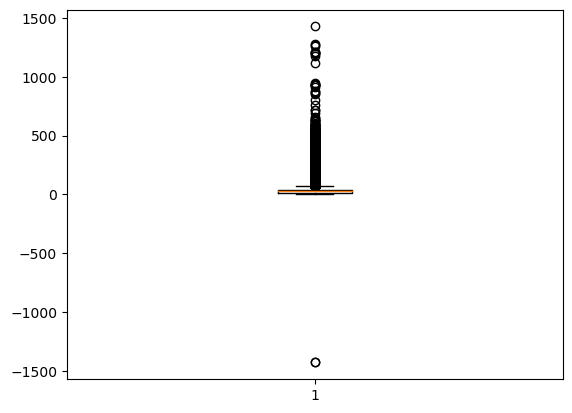

In [52]:
plt.boxplot(global_df["journey_duration"])

In [53]:
#we have a negative value
global_df[global_df["journey_duration"]<0]

,journey_id,trip_id,journey_start_datetime,journey_start_date,journey_start_time,journey_start_lon,journey_start_lat,journey_start_insee,journey_start_department,journey_start_towngroup,journey_end_datetime,journey_end_date,journey_end_time,journey_end_lon,journey_end_lat,journey_end_insee,journey_end_department,journey_end_towngroup,operator_class,journey_distance,journey_duration,has_incentive,nb_passengers
1971629,3233469,d6e991d9-bb1e-4dd9-8d84-4382d9cac787,2020-03-18T23:50:00+01:00,2020-03-18,23:50:00,2.52,48.85,93050,93.0,Ile-De-France Mobilites,2020-03-19T00:00:00+01:00,2020-03-19,00:00:00,2.78,48.87,77111,77.0,Ile-De-France Mobilites,C,29743,-1430,OUI,4
5081954,3570297,2c23efd4-5e17-4468-9c54-cfff4131e198,2020-07-13T23:50:00+02:00,2020-07-13,23:50:00,2.59,48.58,77445,77.0,Ile-De-France Mobilites,2020-07-14T00:00:00+02:00,2020-07-14,00:00:00,2.27,48.73,91377,91.0,Ile-De-France Mobilites,C,35443,-1430,OUI,4


In [54]:
#we can drop this row, that makes no sense
global_df = global_df.drop(global_df[global_df["journey_duration"]<0].index)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa534d40460>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa534d40a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa534d40190>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa534d40fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa534d4d2b0>],
 'means': []}

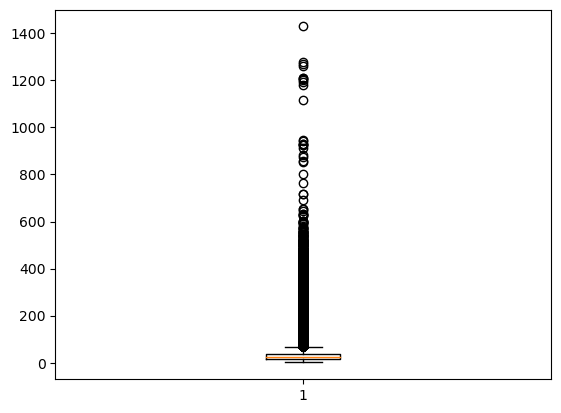

In [55]:
plt.boxplot(global_df["journey_duration"])

In [56]:
global_df["journey_duration"].describe()

count    9.607818e+06
mean     2.880099e+01
std      2.000613e+01
min      1.000000e+00
25%      1.600000e+01
50%      2.500000e+01
75%      3.700000e+01
max      1.429000e+03
Name: journey_duration, dtype: float64

In [57]:
global_df[global_df["journey_duration"]>660]

,journey_id,trip_id,journey_start_datetime,journey_start_date,journey_start_time,journey_start_lon,journey_start_lat,journey_start_insee,journey_start_department,journey_start_towngroup,journey_end_datetime,journey_end_date,journey_end_time,journey_end_lon,journey_end_lat,journey_end_insee,journey_end_department,journey_end_towngroup,operator_class,journey_distance,journey_duration,has_incentive,nb_passengers
40111,2594920,82d466b6-bd80-425b-b055-a3e94c55dce1,2020-02-04T16:40:00+01:00,2020-02-04,16:40:00,2.400,48.630,91521,91.0,Ile-De-France Mobilites,2020-02-05T07:50:00+01:00,2020-02-05,07:50:00,2.420,48.610,91340,91.0,Ile-De-France Mobilites,B,3687,911,OUI,3
2193093,2187877,451aef98-2524-4157-93b6-348c5ea3a59e,2020-01-13T17:40:00+01:00,2020-01-13,17:40:00,2.050,48.780,78297,78.0,Ile-De-France Mobilites,2020-01-14T09:00:00+01:00,2020-01-14,09:00:00,2.290,48.740,92002,92.0,Ile-De-France Mobilites,C,20541,928,OUI,2
2224933,2209790,acf290e7-8e57-4ee2-8529-e2a882dcc89e,2020-01-14T18:20:00+01:00,2020-01-14,18:20:00,3.020,50.560,59437,59.0,Metropole Europeenne De Lille,2020-01-15T09:00:00+01:00,2020-01-15,09:00:00,3.070,50.610,59350,59.0,Metropole Europeenne De Lille,C,9687,882,OUI,2
2502185,2495183,bc285a61-261f-4442-b9c8-ecb4e1f36bd1,2020-01-29T17:00:00+01:00,2020-01-29,17:00:00,2.080,48.760,78297,78.0,Ile-De-France Mobilites,2020-01-30T08:30:00+01:00,2020-01-30,08:30:00,2.040,48.780,78423,78.0,Ile-De-France Mobilites,C,7047,931,OUI,3
2547955,2532725,9b68b559-9521-4732-aaba-c840d7a36e18,2020-01-31T20:00:00+01:00,2020-01-31,20:00:00,2.210,48.810,92072,92.0,Ile-De-France Mobilites,2020-02-01T10:30:00+01:00,2020-02-01,10:30:00,2.260,48.970,95219,95.0,Ile-De-France Mobilites,C,24609,873,OUI,2
2744745,9393737,9ddecc14-2c64-4f70-9f2c-4cbdadfa887e,2022-10-11T09:00:00+02:00,2022-10-11,09:00:00,-4.248,48.452,29103,29.0,CA du Pays de Landerneau-Daoulas,2022-10-11T20:30:00+02:00,2022-10-11,20:30:00,-4.249,48.454,29103,29.0,CA du Pays de Landerneau-Daoulas,B,460,690,NON,2
5847017,3432842,f689ca36-1393-4d34-9d00-51e893806b82,2020-06-18T18:10:00+02:00,2020-06-18,18:10:00,2.520,48.820,94017,94.0,Ile-De-France Mobilites,2020-06-19T06:50:00+02:00,2020-06-19,06:50:00,2.360,48.880,75110,75.0,Ile-De-France Mobilites,B,19412,762,OUI,2
6181754,1082644,adeaaac4-2cfc-4a0b-9cdd-99d772910a2f,2019-08-15T01:50:00+02:00,2019-08-15,01:50:00,2.310,48.690,91161,91,Ile-De-France Mobilites,2019-08-15T17:30:00+02:00,2019-08-15,17:30:00,2.250,48.730,91377,91,Ile-De-France Mobilites,C,9836,941,OUI,2
6363508,1267060,0eff902c-0b59-45ed-98ad-06b59ff083d1,2019-10-14T17:00:00+02:00,2019-10-14,17:00:00,2.050,48.780,78297,78,Ile-De-France Mobilites,2019-10-15T08:50:00+02:00,2019-10-15,08:50:00,2.310,48.780,92007,92,Ile-De-France Mobilites,C,24506,947,OUI,2
6884290,1625501,b44f9fac-fd2a-4835-b271-be636a2981d9,2019-12-06T13:40:00+01:00,2019-12-06,13:40:00,2.290,48.810,92046,92.0,Ile-De-France Mobilites,2019-12-07T13:30:00+01:00,2019-12-07,13:30:00,2.380,48.880,75056,75.0,Ile-De-France Mobilites,B,17010,1429,OUI,2


In [58]:
#All the journey with a duration above 700 minutes took place the same day so it must be a registration mistake
#We can drop these rows

In [59]:
global_df = global_df.drop(global_df[global_df["journey_duration"]>660].index)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa534b2a9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa534b2af70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa534b2a700>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa534b38550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa534b38820>],
 'means': []}

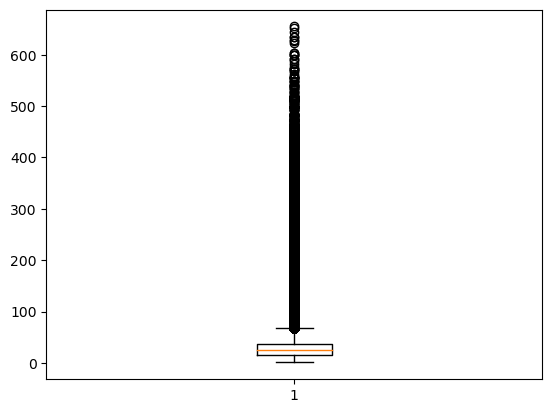

In [60]:
plt.boxplot(global_df["journey_duration"])

#### Distance

In [61]:
global_df['journey_distance'].value_counts()[0]

122

In [62]:
#Now that we clean the journey_duration, we have more less issues with journey_distance, so we can just drop the 122 rows

In [63]:
global_df = global_df.drop(global_df[global_df["journey_distance"]==0].index)

## Checking the hours 

In [69]:
#in order to be sure to be able to analize hours
global_df.dtypes

journey_id                    int64
trip_id                      object
journey_start_datetime       object
journey_start_date           object
journey_start_time           object
journey_start_lon           float64
journey_start_lat           float64
journey_start_insee          object
journey_start_department     object
journey_start_towngroup      object
journey_end_datetime         object
journey_end_date             object
journey_end_time             object
journey_end_lon             float64
journey_end_lat             float64
journey_end_insee            object
journey_end_department       object
journey_end_towngroup        object
operator_class               object
journey_distance              int64
journey_duration              int64
has_incentive                object
nb_passengers                 int64
dtype: object

In [76]:
global_df.head()


,journey_id,trip_id,journey_start_datetime,journey_start_date,journey_start_time,journey_start_lon,journey_start_lat,journey_start_insee,journey_start_department,journey_start_towngroup,journey_end_datetime,journey_end_date,journey_end_time,journey_end_lon,journey_end_lat,journey_end_insee,journey_end_department,journey_end_towngroup,journey_distance,journey_duration,has_incentive,nb_passengers,year
0,2520011,f5bc5273-79ab-42c9-9c22-aef9b375f87e,2020-02-01T00:00:00+01:00,2020-02-01,00:00:00,2.51,48.89,93062,93.0,Ile-De-France Mobilites,2020-02-01T00:50:00+01:00,2020-02-01,00:50:00,2.54,48.90,93014,93.0,Ile-De-France Mobilites,3187,47,OUI,2,2020
1,2519969,b737dca1-e1e8-4d73-bac5-4f2240b153f3,2020-02-01T00:00:00+01:00,2020-02-01,00:00:00,2.76,48.85,77307,77.0,Ile-De-France Mobilites,2020-02-01T00:20:00+01:00,2020-02-01,00:20:00,2.83,48.88,77315,77.0,Ile-De-France Mobilites,8773,15,OUI,2,2020
2,2519968,c6e2cdda-2348-4389-8490-78b2704a43a5,2020-02-01T00:00:00+01:00,2020-02-01,00:00:00,2.28,48.84,75056,75.0,Ile-De-France Mobilites,2020-02-01T00:20:00+01:00,2020-02-01,00:20:00,2.28,48.82,92040,92.0,Ile-De-France Mobilites,3143,15,OUI,2,2020
3,2519970,e6baafd7-1aeb-4a6e-b7aa-3f5f54e4559b,2020-02-01T00:00:00+01:00,2020-02-01,00:00:00,2.26,48.72,91377,91.0,Ile-De-France Mobilites,2020-02-01T00:20:00+01:00,2020-02-01,00:20:00,2.31,48.70,91161,91.0,Ile-De-France Mobilites,7491,16,OUI,2,2020
4,2519963,8b31f193-af61-4664-bbde-52d93271dc95,2020-02-01T00:00:00+01:00,2020-02-01,00:00:00,2.78,48.87,77132,77.0,Ile-De-France Mobilites,2020-02-01T00:10:00+01:00,2020-02-01,00:10:00,2.81,48.87,77268,77.0,Ile-De-France Mobilites,3991,8,OUI,2,2020


In [75]:
global_df.shape

(9607669, 23)

In [72]:
global_df['journey_start_date'] = pd.to_datetime(global_df['journey_start_date'])
global_df["year"]=global_df['journey_start_date'].dt.year

In [77]:
global_df.to_csv("/Users/clemence/IRONHACK/Final_project/Main data set clean/global_df_clean.csv")

In [78]:
global_df["year"].value_counts()

2022    4911173
2020    1712378
2021    1477834
2023     754662
2019     751622
Name: year, dtype: int64

In [79]:
df_2022=global_df[global_df["year"]==2022]

In [80]:
df_2022.shape

(4911173, 23)

In [81]:
df_2022.to_csv("/Users/clemence/IRONHACK/Final_project/Main data set clean/df2022_clean.csv")

In [4]:
df_2022=pd.read_csv("/Users/clemence/IRONHACK/Final_project/Main data set clean/df2022_clean.csv")

/var/folders/54/4cl_lcsx2v3_cd3ntyrh62340000gn/T/ipykernel_37802/2119328743.py:1: DtypeWarning: Columns (8,9,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022=pd.read_csv("/Users/clemence/IRONHACK/Final_project/Main data set clean/df2022_clean.csv")


In [8]:
df_2022_part1=df_2022.iloc[:2500000,:]

In [9]:
df_2022_part2=df_2022.iloc[2500000:,:]

In [11]:
df_2022_part1.shape

(2500000, 24)

In [12]:
df_2022_part2.shape

(2411173, 24)

In [14]:
from sqlalchemy import create_engine
import pymysql.cursors 
import os
import getpass
pw = getpass.getpass()

········


In [15]:
connection_string = 'mysql+pymysql://root:' + pw + '@localhost:3306/' 
engine = create_engine(connection_string)


In [16]:
df_2022_part1.to_sql('carpool_2022_part1', engine, 'Final_Project', if_exists='replace', index = False)

2500000

In [18]:
global_df=pd.read_csv("/Users/clemence/IRONHACK/Final_project/Main data set clean/global_df_clean.csv")

/var/folders/54/4cl_lcsx2v3_cd3ntyrh62340000gn/T/ipykernel_37802/2248467420.py:1: DtypeWarning: Columns (8,9,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  global_df=pd.read_csv("/Users/clemence/IRONHACK/Final_project/Main data set clean/global_df_clean.csv")


In [19]:
df_2019=global_df[global_df["year"]==2019]

In [21]:
df_2019.to_csv("/Users/clemence/IRONHACK/Final_project/Main data set clean/df2019_clean.csv")

In [22]:
df_2019.to_sql('carpool_2019', engine, 'Final_Project', if_exists='replace', index = False)

751622

In [24]:
df_2020=global_df[global_df["year"]==2020]
df_2020.to_csv("/Users/clemence/IRONHACK/Final_project/Main data set clean/df2020_clean.csv")

In [25]:
df_2020.to_sql('carpool_2020', engine, 'Final_Project', if_exists='replace', index = False)

1712378

In [27]:
df_2021=global_df[global_df["year"]==2021]
df_2021.to_csv("/Users/clemence/IRONHACK/Final_project/Main data set clean/df2021_clean.csv")

In [28]:
df_2021.to_sql('carpool_2021', engine, 'Final_Project', if_exists='replace', index = False)

1477834

In [30]:
df_2023=global_df[global_df["year"]==2023]
df_2023.to_csv("/Users/clemence/IRONHACK/Final_project/Main data set clean/df2023_clean.csv")

In [31]:
df_2023.to_sql('carpool_2023', engine, 'Final_Project', if_exists='replace', index = False)

754662

In [33]:
df_2022_part2.to_sql('carpool_2022_part2', engine, 'Final_Project', if_exists='replace', index = False)

2411173